In [1]:
# Multi-Label Classification of RGB Images of Cats & Dogs using a CNN
import random
from pathlib import Path

import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
print(tf.config.list_physical_devices())
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# params.
IMAGE_SIZE = 128 # pixels
N_PROCESS = None # if None, uses all
TEST_PCT = 0.3
SEED = 111
BATCH_SIZE = 64
EPOCHS = 10
GRAY_SCALE = False
CHANNELS = 1 if GRAY_SCALE else 3

# files: 2000


 31%|█████████▎                    | 620/2000 [00:00<00:02, 678.58it/s]

file: data/Cat/140.jpg. error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

file: data/Cat/660.jpg. error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 73%|█████████████████████▏       | 1460/2000 [00:02<00:00, 702.06it/s]

file: data/Cat/666.jpg. error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 81%|███████████████████████▍     | 1613/2000 [00:02<00:00, 730.21it/s]

file: data/Cat/936.jpg. error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|█████████████████████████████| 2000/2000 [00:02<00:00, 698.84it/s]

file: data/Cat/850.jpg. error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

# data: 1995 | X-shape: (128, 128, 3) | y: [1, 0]


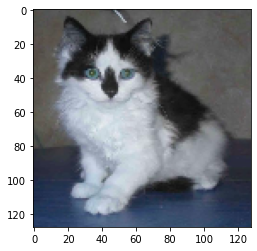

In [3]:
def process_img_file(p):
    label = p.parent.stem # Cat/Dog
    img_arr = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE) if GRAY_SCALE else cv2.imread(str(p))
    img_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE))
    label = [1, 0] if label=="Cat" else [0, 1] # order: [cat, dog]        
    return [img_arr, label]

data = []
img_paths = list(Path("./data/").glob("**/*.jpg"))
print(f"# files: {len(img_paths)}")
random.shuffle(img_paths, random=random.seed(SEED))
img_paths = img_paths[:N_PROCESS]
for p in tqdm(img_paths):
    try:
        data.append(process_img_file(p))
    except Exception as err:
        print(f"file: {p}. error: {err}")
        continue
print(f"# data: {len(data)} | X-shape: {data[0][0].shape} | y: {data[0][1]}")
plt.imshow(data[0][0])

In [4]:
def process_X_y(datapoint:list):
    _x = datapoint[0]
    _y = datapoint[1]
    _x = _x.reshape(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    _x = _x / 255.0 # normalize
    return _x, _y

X = []
y = []
for dp in tqdm(data):
    _x, _y = process_X_y(dp)
    X.append(_x)
    y.append(_y)
X = np.array(X)
y = np.array(y)

print(f"X: {X.shape} | x: {X[0].shape} | y: {y.shape}")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_PCT, random_state=SEED) # train/test split
print(f"X_train: {X_train.shape} | y_train: {y_train.shape} | X_val: {X_val.shape} | y_val: {y_val.shape}")

100%|███████████████████████████| 1995/1995 [00:00<00:00, 13138.42it/s]


X: (1995, 128, 128, 3) | x: (128, 128, 3) | y: (1995, 2)
X_train: (1396, 128, 128, 3) | y_train: (1396, 2) | X_val: (599, 128, 128, 3) | y_val: (599, 2)


In [5]:
model = Sequential()

# input layer: convolution layer of 64 neurons, 3x3 conv window & input shape 60x60x3
model.add(Conv2D(64, (3, 3), input_shape=X[0].shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) # 2x2 pooling window

# layer 2
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Flatten()) # Convert 3D Feature to 1D before Dense layer
model.add(Dense(64))

# output layer
model.add(Dense(2, activation="sigmoid")) # 2 = no. of labels

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics = ['accuracy'] )

Metal device set to: Apple M1 Pro


2022-03-05 23:34:05.721156: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 23:34:05.721375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-03-05 23:34:06.884021: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 23:34:07.134985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.2025 - accuracy: 0.5007

2022-03-05 23:34:10.436937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 4s 180ms/step - loss: 1.2025 - accuracy: 0.5007 - val_loss: 0.6927 - val_accuracy: 0.5192
Epoch 2/10
22/22 [==============================] - 4s 167ms/step - loss: 0.6873 - accuracy: 0.5616 - val_loss: 0.6809 - val_accuracy: 0.5676
Epoch 3/10
22/22 [==============================] - 4s 165ms/step - loss: 0.6268 - accuracy: 0.6633 - val_loss: 0.6553 - val_accuracy: 0.6327
Epoch 4/10
22/22 [==============================] - 4s 170ms/step - loss: 0.5751 - accuracy: 0.7027 - val_loss: 0.6526 - val_accuracy: 0.6511
Epoch 5/10
22/22 [==============================] - 4s 167ms/step - loss: 0.5334 - accuracy: 0.7443 - val_loss: 0.7080 - val_accuracy: 0.6311
Epoch 6/10
22/22 [==============================] - 4s 166ms/step - loss: 0.4867 - accuracy: 0.7672 - val_loss: 0.6550 - val_accuracy: 0.6461
Epoch 7/10
22/22 [==============================] - 4s 167ms/step - loss: 0.4400 - accuracy: 0.8123 - val_loss: 0.7092 - val_accuracy: 0.6361
Epoch 8/10
22/22 

<AxesSubplot:>

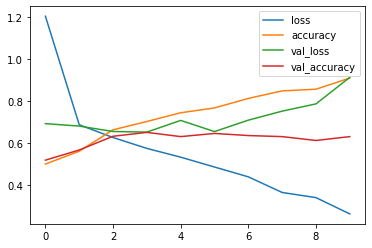

In [6]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))
table = pd.DataFrame(model.history.history)
table.plot()

(128, 128, 3)
pred: [[0.72148144 0.27531755]]
actual: [1 0]


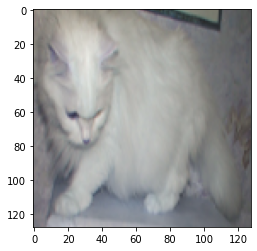

In [11]:
# predict single
i = 5
sample = X_val[i]
print(sample.shape)
plt.imshow(sample)
sample = np.expand_dims(sample, axis=0) 
print(f"pred: {model.predict(sample)}")
print(f"actual: {y_val[i]}")

In [12]:
# predict batch
model.predict(X_val)

array([[4.21876073e-01, 6.08531773e-01],
       [1.02993785e-04, 9.99983549e-01],
       [4.72402602e-01, 5.21992028e-01],
       ...,
       [8.64967227e-01, 1.45066693e-01],
       [7.68856585e-01, 1.81195170e-01],
       [9.77909803e-01, 1.33219231e-02]], dtype=float32)